In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("placementdata.csv")

# View first few rows
data.head()
# data.tail()


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [2]:
data.drop(['StudentID'], axis=1, inplace=True)

In [3]:
obj = (data.dtypes == 'object')
print("Categorical variables:", len(list(obj[obj].index)))


Categorical variables: 3


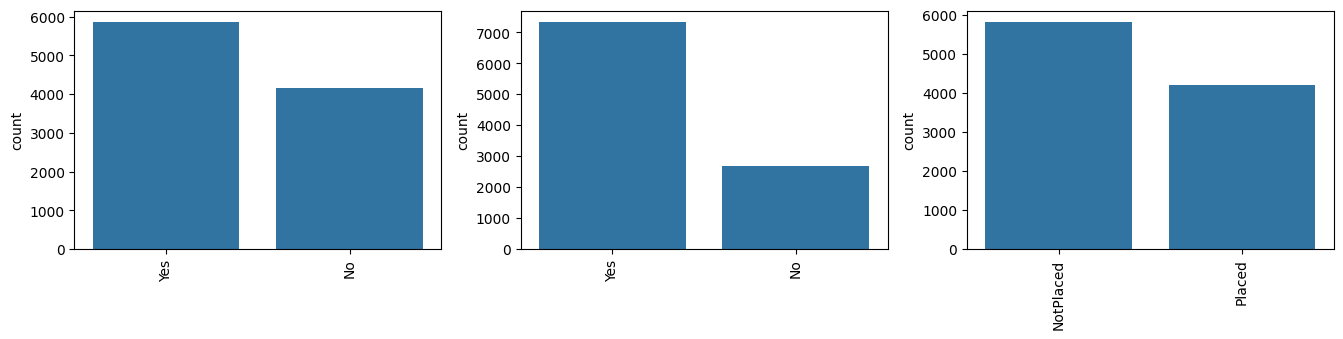

In [4]:
object_cols = list(obj[obj].index)

plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

plt.tight_layout()
plt.show()


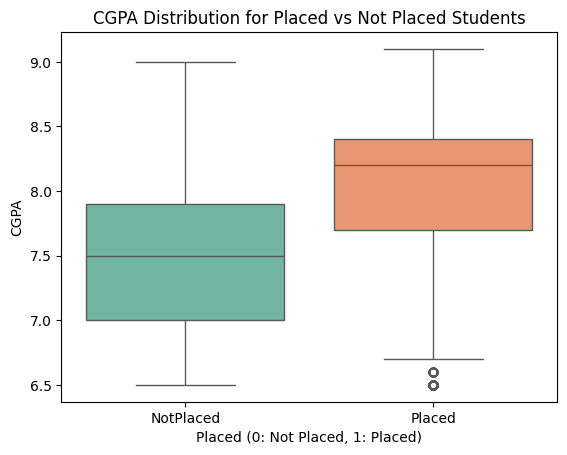

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for CGPA distribution based on Placement status
sns.boxplot(x='PlacementStatus', y='CGPA', data=data, hue='PlacementStatus', palette="Set2", legend=False)

# Add labels and title
plt.xlabel('Placed (0: Not Placed, 1: Placed)')
plt.ylabel('CGPA')
plt.title('CGPA Distribution for Placed vs Not Placed Students')

# Show the plot
plt.show()


In [6]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Violin plot for CGPA distribution based on Placement status
# sns.violinplot(x='PlacementStatus', y='CGPA', data=data, palette='Set2')

# # Add labels and title
# plt.xlabel('Placed (0: Not Placed, 1: Placed)')
# plt.ylabel('CGPA')
# plt.title('CGPA Distribution and Density for Placed vs Not Placed Students')

# # Show the plot
# plt.show()


In [7]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')

for col in list(obj[obj].index):
    data[col] = label_encoder.fit_transform(data[col])


In [8]:
obj = (data.dtypes == 'object')
print("Categorical variables:", len(list(obj[obj].index)))


Categorical variables: 0


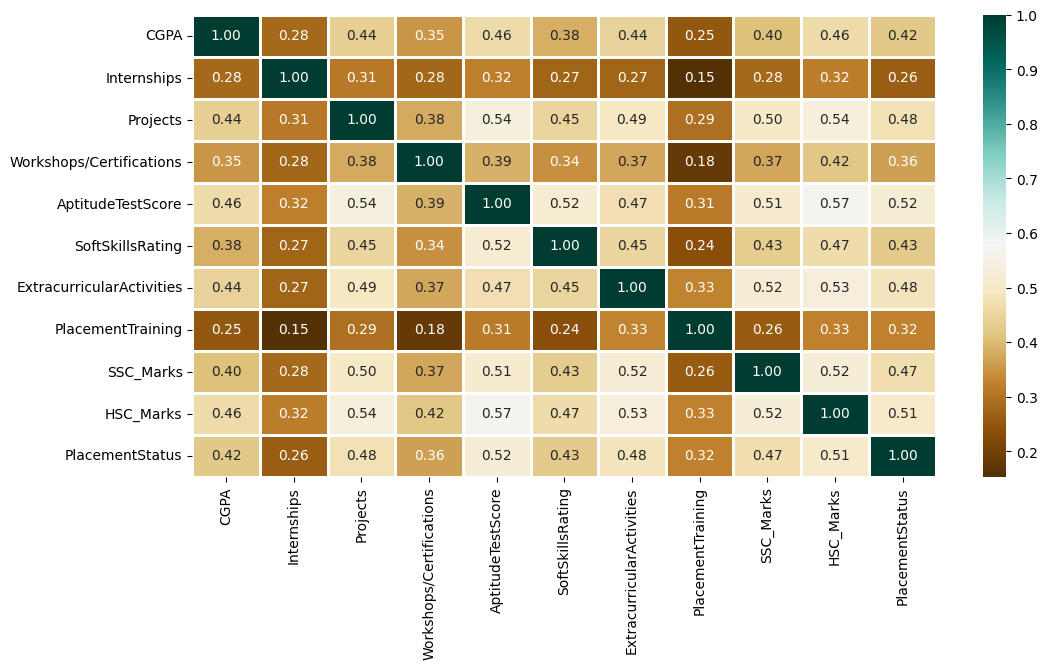

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.show()


In [10]:

for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

# Check missing values
data.isna().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(['PlacementStatus'], axis=1)
Y = data['PlacementStatus']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((6000, 10), (4000, 10), (6000,), (4000,))

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier 


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define classifiers
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression(max_iter=2000)  # increased max_iter
xgb = XGBClassifier(eval_metric='logloss', random_state=7)

print("Training Accuracy:\n")
for clf in (rfc, knn, svc, lc,xgb):
    clf.fit(X_train_scaled, Y_train)
    Y_pred_train = clf.predict(X_train_scaled)
    print("Accuracy score of", clf.__class__.__name__, "=", 100 * metrics.accuracy_score(Y_train, Y_pred_train))


Training Accuracy:

Accuracy score of RandomForestClassifier = 97.65
Accuracy score of KNeighborsClassifier = 85.88333333333334
Accuracy score of SVC = 80.80000000000001
Accuracy score of LogisticRegression = 79.63333333333334
Accuracy score of XGBClassifier = 95.05


In [13]:
# New student's data (example)
# For example: CGPA = 8.2, Internships = 1, Projects = 2, Workshops/Certifications = 2, 
# AptitudeTestScore = 85, SoftSkillsRating = 4.5, ExtracurricularActivities = 1, 
# PlacementTraining = 1, SSC_Marks = 78, HSC_Marks = 90

import numpy as np
import pandas as pd

# New student data
new_student = np.array([[8.8, 1, 2, 2, 85, 4, 1, 1, 80, 88]])

# Feature names
feature_names = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 
                 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 
                 'PlacementTraining', 'SSC_Marks', 'HSC_Marks']

# Create DataFrame
new_student_df = pd.DataFrame(new_student, columns=feature_names)

# Scale the new data using the same scaler used during training
new_student_scaled = scaler.transform(new_student_df)

# Predict using the trained model
placement_prediction = rfc.predict(new_student)
placement_prediction_xgb = xgb.predict(new_student)

# Output result
print("Prediction(RandomForestClassifier):", "Placed" if placement_prediction[0] == 1 else "Not Placed")
print("Prediction (XGBoost)              :", "Placed" if placement_prediction_xgb[0] == 1 else "Not Placed")




Prediction(RandomForestClassifier): Placed
Prediction (XGBoost)              : Placed


In [14]:
# New student data (same as before)
new_student = np.array([[8.8, 1, 2, 2, 85, 4, 1, 1, 80, 88]])

# Predict using the trained RandomForestClassifier
placement_prediction = rfc.predict(new_student)

# Get the probability of being placed (class 1)
placement_probability = rfc.predict_proba(new_student)[:, 1]

placement_prediction_xgb = xgb.predict(new_student)

# Get the probability of being placed (class 1)
placement_probability_xgb = xgb.predict_proba(new_student)[:, 1]



# Print result: Show whether the student is placed or not and the placement probability
print("Prediction (RandomForestClassifier)            :", "Placed" if placement_prediction[0] == 1 else "Not Placed")
print(f"Placement Probability (RandomForestClassifier) : {placement_probability[0] * 100:.2f}%")
print()
# Print result: Show whether the student is placed or not and the placement probability
print("Prediction (XGBoost)                           :", "Placed" if placement_prediction_xgb[0] == 1 else "Not Placed")
print(f"Placement Probability (XGBoost)                : {placement_probability_xgb[0] * 100:.2f}%")


Prediction (RandomForestClassifier)            : Placed
Placement Probability (RandomForestClassifier) : 71.43%

Prediction (XGBoost)                           : Placed
Placement Probability (XGBoost)                : 94.27%


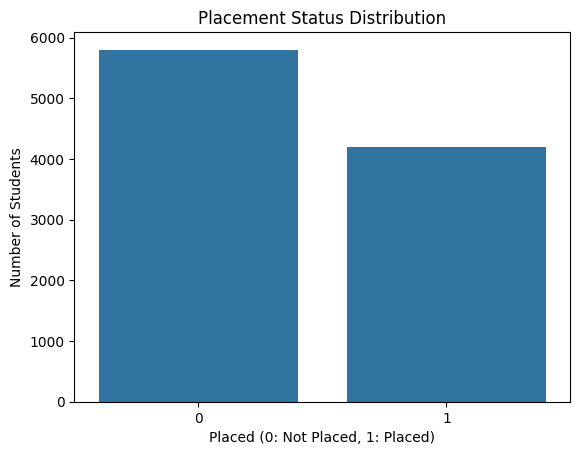

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the count of placed vs not placed students
sns.countplot(x='PlacementStatus', data=data)

# Add labels and title
plt.xlabel('Placed (0: Not Placed, 1: Placed)')
plt.ylabel('Number of Students')
plt.title('Placement Status Distribution')

# Show the plot
plt.show()

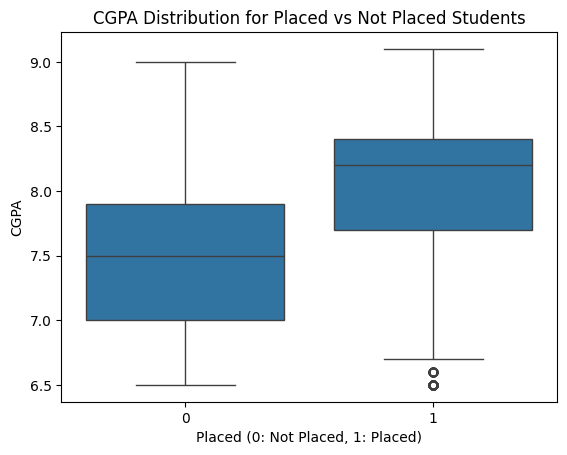

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for CGPA distribution based on Placement status
sns.boxplot(x='PlacementStatus', y='CGPA', data=data)

# Add labels and title
plt.xlabel('Placed (0: Not Placed, 1: Placed)')
plt.ylabel('CGPA')
plt.title('CGPA Distribution for Placed vs Not Placed Students')

# Show the plot
plt.show()


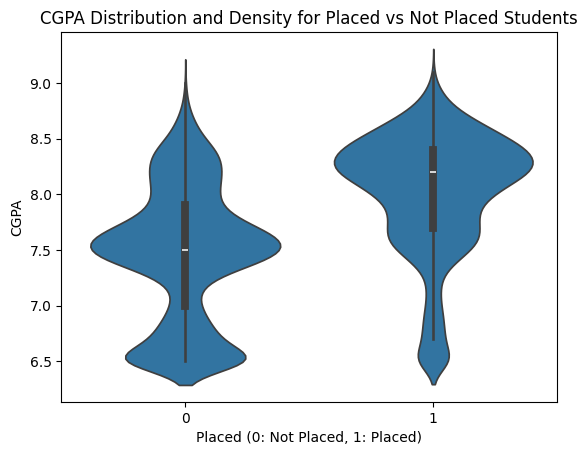

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for CGPA distribution based on Placement status
sns.violinplot(x='PlacementStatus', y='CGPA', data=data)

# Add labels and title
plt.xlabel('Placed (0: Not Placed, 1: Placed)')
plt.ylabel('CGPA')
plt.title('CGPA Distribution and Density for Placed vs Not Placed Students')

# Show the plot
plt.show()
